INtegración Mediante simulación de MOntecarlo


<fx> = 1/a-b int(a b) F(x) dx
1/a-b 1/N sum F(xi) cercano integral
    
1. Establecer funcion que queremos integrar
2. Limites de integracion
3. Generar los numero aleatorios de la simulación
4. Crear la funcion de la suma 
    
   

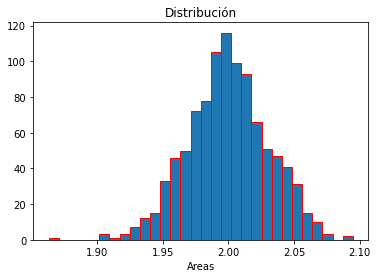

In [6]:
 %matplotlib inline
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
    
class Integral():
    
    def __init__(self,a,b,N,funcion):
        self.a = a 
        self.b = b
        self.N = N
        self.func = funcion
       
        self.areas()
    
    def calc(self):
        integral = 0.0
        xrand = np.random.uniform(self.a,self.b,self.N)
        for i in range(self.N):
            
            integral += self.func(xrand[i])
            
        res = (self.b-self.a)/float(self.N)*integral
        return res

    def areas(self):
        areas = []
        for i in range(self.N):
            areas.append(self.calc())
        
        self.hist(areas)
    
    def hist(self,areas):
        plt.title("Distribución")
        plt.hist(areas,bins=30,ec="red")
        plt.xlabel("Areas")
        
        

        

funcion = lambda x: np.sin(x)

integral_sen = Integral(0,np.pi,1000,funcion)
        
        
    
    


In [46]:
import xlsxwriter
import time
import pandas

class Main():
    def __init__(self):
        #1. encontrar la fecha para guardar el documento
        self.get_fecha()
        
        #2. 
        self.filename = "Clase Taller Python "+ self.fecha+".xlsx"
        self.WB = xlsxwriter.Workbook(self.filename)
        
        self.formato()
        
        #3.crear sheet
        self.CV = self.WB.add_worksheet("Cover")
        self.CV.set_tab_color("#E1578A")
        self.CV.hide_gridlines(2)
        self.CV.merge_range("B2:E2","Taller de Python",self.formTitulo)
        self.CV.write("C4","Michael Shane Reilly",self.formSubtitulo)
        
        #4.crear sheet datos
        self.DT = self.WB.add_worksheet("Regresión")
        self.DT.set_tab_color("#F8DF8B")
        self.DT.hide_gridlines(2)
        self.DT.merge_range("B2:E2","Regresión Lineal",self.formTitulo)
        self.DT.write("C4","PIB potencial",self.formSubtitulo)
        self.DT.write("C6","Y",self.formhead)
        self.DT.write("D6","X",self.formhead)
        
        #5. Datos
        X = []
        Y = []
        
        randnums= np.random.randint(1,100, size=(1000,2))
        for i in range(len(randnums)):
            Y.append(randnums[i,0])
            X.append(randnums[i,1])
            self.DT.write(i+6,2,Y[-1])
            self.DT.write(i+6,3,X[-1])
        
        #6. Calcular estadisticos
        mean_y = np.mean(Y)
        self.DT.write("F6","Mean Y",self.formhead)
        self.DT.write("G6",mean_y)
        
        mean_x = np.mean(X)
        self.DT.write("F7","Mean X",self.formhead)
        self.DT.write("G7",mean_x)
        
        n = len(X)
        self.DT.write("F8","numero datos",self.formhead)
        self.DT.write("G8",n)
        self.DT.set_column('F:F', 16)
        
    
        #6. Regresión
        numerador = 0
        denominador = 0
        
        for i in range(n):
            numerador += (X[i]-mean_x)*(Y[i]-mean_y)
            denominador += (X[i]-mean_x)**2
        
        b1 = numerador/denominador
        b0 = mean_y -(b1*mean_x)
        
        #ponemos en excel
        self.DT.write("F9","b0",self.formhead)
        self.DT.write("G9",b0)
        self.DT.write("F10","b1",self.formhead)
        self.DT.write("G10",b1)
        
        #Calcular R2
        
        RSS = 0
        TSS = 0 
        
        for i in range(n):
            y_pron = b0+b1*X[i]
            TSS += (Y[i]-mean_y)**2
            RSS += (Y[i]-y_pron)**2
            
        r2 = 1- (RSS/TSS)
        
        #ponemos en excel
        self.DT.write("F10","r2",self.formhead)
        self.DT.write("G10",r2)
        
        
        
        #F. salvar y cerrar
        self.WB.close()
        print("Listo excel")
        
    def get_fecha(self):
        self.time = time.localtime()
        self.fecha = time.strftime("%d%m%Y",self.time)
        
    def formato(self):
        self.formTitulo = self.WB.add_format({
            'italic':True,
            'bold': True,
            'align': 'center',
            'valign': 'vcenter',
            'font_name': "Calibri",
            'font_size': 30,
            'text_wrap': False,  
        })
        
        self.formSubtitulo = self.WB.add_format({
            'align': 'center',
            'valign': 'vcenter',
            'font_name': "Calibri",
            'font_size': 15,
            'text_wrap': False,
            'font_color': "#1597E5"  
        })
        
        self.formhead = self.WB.add_format({
            'align': 'center',
            'valign': 'vcenter',
            'font_name': "Calibri",
            'font_size': 15,
            'text_wrap': False,
            'font_color': "white",
            'bg_color': "#0091DA", 
        })
        
        
excel = Main()

Listo excel
